### 12.3.6 텐서플로우 2.x 소개

**텐서플로우(Tensorflow)** : 파이썬(Python)을 이용해 딥러닝 학습 시 사용하는 라이브러리<br>

* 시퀀스 API<br>
    * Sequential() : 딥러닝 구조의 층을 쌓을 수 있는 함수 → 신경망 모형을 선언, 생성하는 것<br>
        * model.add() : 실제로 층을 쌓는 함수<br>

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (32, 32, 1)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.summary()
```
* 모형 생성 → add 메소드를 통해 층을 쌓음 → summary 매소드로 모형 확인<br><br>

* 함수형 API<br>

```python
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape = (32, 32, 1))
x = Dense(units = 100, activation = 'relu')(input_layer)
x = Dense(units = 50, activation = 'relu')(x)
output_layer = Dense(units = 5, activation = 'softmax')(x)
model2 = Model(input_layer, output_layer)

model2.summary()
```

* 모형 저장 및 불러오기<br>
    * 모형을 매번 학습시키는 것이 아니라 이전에 만들어 놓았던 모형을 불러와 바로 사용할 수 있어 시간을 절약할 수 있음<br>
    * model.save() : 모형 저장<br>
        * .h5(hdf5, Hierarchical Data Format version 5) : 대용량 데이터를 저장하기 위한 파일 포맷<br>
    * load_model() : 저장한 모형 불러오기<br>

```python
# 모형 저장
model.save('cnn_model.h5')

# 모형 불러오기
from tensorflow.keras.models import load_model
cnn_model2 = load_model('cnn_model.h5')
```

* 배치 사이즈(Batch Size), 에폭(Epoch), 반복(Iteration)의 차이<br>
    * 배치 사이즈(Batch Size) : 전체 훈련 데이터를 여러 개의 미니 배치(Mini Batch)로 나누었을 때, 하나의 미니 배치에 속하는 데이터의 개수<br>
        * 학습 시간을 줄이고 효율적으로 리소스를 활용하기 위함<br>
    * 에폭(Epoch) : 전체 훈련 Set이 신경망을 통과한 횟수<br>
        * 1-epoch : 훈련 Set에 포함되는 모든 데이터 포인트가 신경망을 한 번 통과했다는 것을 의미<br>
    * 반복(Iteration) : 1-epoch를 마치는 데 필요한 미니 배치 수<br>
        * 훈련 데이터가 700개로 구성되어 있을 때, Batch Size를 100으로 설정하여 미니 배치 7개로 나누었다고 한다면, 훈련 데이터 전체가 신경망을 통과하기 위해서는 총 7개의 미니 배치를 통과시켜야 하므로 Iteration은 7에 해당<br>
        * 파라미터 업데이터 횟수와 동일<br>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (32, 32, 1)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 100)       200       
_________________________________________________________________
dense_1 (Dense)              (None, 32, 32, 50)        5050      
_________________________________________________________________
dense_2 (Dense)              (None, 32, 32, 5)         255       
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape = (32, 32, 1))
x = Dense(units = 100, activation = 'relu')(input_layer)
x = Dense(units = 50, activation = 'relu')(x)
output_layer = Dense(units = 5, activation = 'softmax')(x)
model2 = Model(input_layer, output_layer)

model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
dense_3 (Dense)              (None, 32, 32, 100)       200       
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 50)        5050      
_________________________________________________________________
dense_5 (Dense)              (None, 32, 32, 5)         255       
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


### 12.3.7 분류 신경망 실습

* **신경망을 이용하여 와인 종류를 분류하는 모형 만들기**<br>

```python
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import triain_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.activations import relu

import matplotlib.pyplot as plt

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
raw_wine = datasets.load_wine()

# 피처, 타깃 데이터 지정
X = raw_wine.data
y = raw_wine.target

# 피처 데이터 차원 확인
print(X.shape)

# 타깃 데이터 종류 확인
print(set(y))

# 타깃 데이터 원-핫 인코딩
y_hot = to_categorical(y)

# 훈련/테스트 데이터 분할
x_tn, x_te, y_tn, y_te = train_test_split(X, y_hot, random_state = 0)

# 신경망 생성
n_feat = x_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim = n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

# 신경망 모형 구조 확인
model.summary()

# 모형 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics['accuracy'])

# 신경망 학습
hist = model.fit(x_tn, y_tn, epochs = epo, batch_size = 5)

# 훈련 데이터 평가
print(model.evaluate(x_tn, y_tn)[1])

# 테스트 데이터 평가
print(model.evaluate(x_te, y_te)[1])

epoch = np.arange(1, epo + 1)
accuracy = hist.history['accuracy']
loss = hist.history['loss']

# 정확도 학습 그래프
plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(epoch, loss, 'r', label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
```


In [3]:
# 랜덤 시드 설정
# 일관된 결괏값이 나오도록 함
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [4]:
# 데이터 불러오기 : 와인 데이터
from sklearn import datasets

raw_wine = datasets.load_wine()

In [5]:
# 피처, 타깃 데이터 지정
X = raw_wine.data # 피처 데이터 설정
y = raw_wine.target # 타깃 데이터 설정

In [6]:
# 피처 데이터 차원 확인
# 딥러닝에 사용되는 피처가 몇 개인지 확인하기 위함
print(X.shape)

(178, 13)


In [7]:
# 타깃 데이터 종류 확인
# 라벨 종류를 확인함으로써 분류 문제인지 회귀 문제인지 파악
# 분류 문제라면 몇 가지 클래스로 구분되는지 확인 가능
print(set(y))

{0, 1, 2}


In [8]:
# 타깃 데이터 원-핫 인코딩
# 범주형 데이터
from tensorflow.keras.utils import to_categorical

y_hot = to_categorical(y)
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [12]:
# 훈련/테스트 데이터 분할
from sklearn.model_selection import train_test_split

x_tn, x_te, y_tn, y_te = train_test_split(X, y_hot, random_state = 0)

In [13]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.activations import relu

n_feat = x_tn.shape[1] # 신경망에 사용되는 피처 개수 저장 : 13
n_class = len(set(y)) # 클래스 개수 저장 : 3
epo = 30 # 딥러닝 학습 횟수

model = Sequential() # 초기 모형 생성
model.add(Dense(20, input_dim = n_feat)) # Dense() : 층 추가, 20 : Output 차원, input_dim : 피처 개수
model.add(BatchNormalization()) # 배치 정규화
model.add(Activation('relu')) # 활성화 함수 사용 : ReLU
model.add(Dense(n_class)) # 최종 Output 층
model.add(Activation('softmax')) # 활성화 함수 사용 : Softmax

In [14]:
# 신경망 모형 구조 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                280       
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 63        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________


In [16]:
# 모형 컴파일
# loss : 손실 함수
# 이진 분류 : loss = 'binary_crossentropy', 다중 분류 : loss = 'categorical_crossentropy'
# metrics : 평가 기준
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
# 신경망 학습
hist = model.fit(x_tn, y_tn, epochs = epo, batch_size = 5)

Epoch 1/30
27/27 [==============================] - 1s 3ms/step - loss: 2.0335 - accuracy: 0.3937
Epoch 2/30
27/27 [==============================] - 0s 2ms/step - loss: 1.7389 - accuracy: 0.3261
Epoch 3/30
27/27 [==============================] - 0s 2ms/step - loss: 1.3710 - accuracy: 0.3772
Epoch 4/30
27/27 [==============================] - 0s 2ms/step - loss: 1.0671 - accuracy: 0.4106
Epoch 5/30
27/27 [==============================] - 0s 2ms/step - loss: 0.9359 - accuracy: 0.4771
Epoch 6/30
27/27 [==============================] - 0s 2ms/step - loss: 0.9315 - accuracy: 0.5169
Epoch 7/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8463 - accuracy: 0.5764
Epoch 8/30
27/27 [==============================] - 0s 2ms/step - loss: 0.7689 - accuracy: 0.6461
Epoch 9/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8440 - accuracy: 0.5584
Epoch 10/30
27/27 [==============================] - 0s 2ms/step - loss: 0.7814 - accuracy: 0.5969
Epoch 11/30
27/27 [

In [18]:
# 학습 평가
# 훈련 데이터 평가
print(model.evaluate(x_tn, y_tn)[1])

# 테스트 데이터 평가
print(model.evaluate(x_te, y_te)[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.6165
0.61654132604599
2/2 [==============================] - 0s 3ms/step - loss: 0.7379 - accuracy: 0.6889
0.6888889074325562


In [19]:
# 정확도 및 손실 정도 시각화 준비
import numpy as np

# 시각화 플롯에서 x축에 적용될 epoch 설정
epoch = np.arange(1, epo + 1)
print(epoch)

# 각 epoch 별 정확도 확인
accuracy = hist.history['accuracy']
print(accuracy)

# 각 epoch 별 손실 정도 확인
loss = hist.history['loss']
print(loss)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[0.3458646535873413, 0.3834586441516876, 0.39849624037742615, 0.4436090290546417, 0.5263158082962036, 0.6015037298202515, 0.5639097690582275, 0.6240601539611816, 0.5939849615097046, 0.61654132604599, 0.6616541147232056, 0.6842105388641357, 0.6842105388641357, 0.6992481350898743, 0.7142857313156128, 0.7969924807548523, 0.7669172883033752, 0.7593985199928284, 0.7443609237670898, 0.7894737124443054, 0.8045112490653992, 0.7669172883033752, 0.8496240377426147, 0.7894737124443054, 0.8345864415168762, 0.8496240377426147, 0.8646616339683533, 0.8345864415168762, 0.8421052694320679, 0.8421052694320679]
[1.9797918796539307, 1.6155624389648438, 1.2918190956115723, 1.027916431427002, 0.9091551899909973, 0.8727623820304871, 0.8733393549919128, 0.7950961589813232, 0.8200278282165527, 0.7859929800033569, 0.7404748797416687, 0.7205429077148438, 0.7272511124610901, 0.7182273864746094, 0.6584593653678894, 0.63355

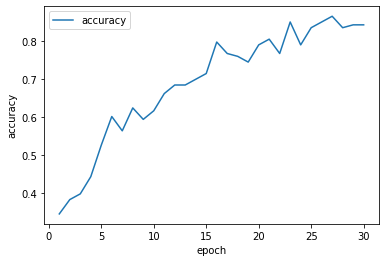

In [20]:
# 정확도 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

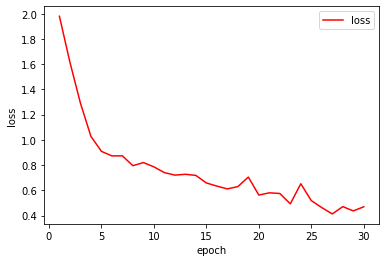

In [21]:
# 손실 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, loss, 'r', label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()